In [1]:
import pandas as pd
import os
import shutil

# Define paths
latent_file_path = '/home/shaghparast/Point_VAE/smlm-pc-vae/logs/Exp_registered_2D/max_points_128_bs_8_latent_dim_8_kl_weight_0.01/1723812915.542496/latent_space_epoch_10.csv'
point_cloud_folder = '/home/shaghparast/Point_VAE/smlm-pc-vae/data/2D_sim/Coordinates'
output_base_folder = '/home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv'

# Read the latent dimensions CSV
latent_df = pd.read_csv(latent_file_path, header=None, skiprows=1)

# Get the number of point cloud files (should be 1399 in your case)
num_files = latent_df.shape[0]
assert num_files == 1399, "The number of files does not match the number of columns in the latent dimensions CSV."


In [112]:

# Create directories for each latent dimension
for i in range(8):
    folder_path = os.path.join(output_base_folder, f'latent_dimension_{i+1}')
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)


In [113]:
import pandas as pd
import os
import shutil

# Define paths
latent_file_path = '/home/shaghparast/Point_VAE/smlm-pc-vae/logs/Sim_registered_2D/max_points_128_bs_8_latent_dim_8_kl_weight_0.01/1723817543.113725/latent_space_epoch_50.csv'
point_cloud_folder = '/home/shaghparast/Point_VAE/smlm-pc-vae/data/Sim_registered_2D/Localizations'
output_base_folder = '/home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv'

# Read the latent dimensions CSV
latent_df = pd.read_csv(latent_file_path, header=None, skiprows=1)

# Verify the shape of the dataframe
assert latent_df.shape == (1399, 8), "The latent dimensions CSV does not have the expected shape."

# Create directories for each latent dimension
for i in range(8):
    folder_path = os.path.join(output_base_folder, f'latent_dimension_{i+1}')
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

# For each latent dimension
for latent_dim in range(8):
    # Sort indices based on the latent dimension
    sorted_indices = latent_df.iloc[:, latent_dim].sort_values(ascending=False).index

    # Reorder CSV files based on sorted indices
    for rank, index in enumerate(sorted_indices):
        # Construct the filename of the point cloud
        filename = f'file{index+1}.csv'
        point_cloud_path = os.path.join(point_cloud_folder, filename)
        
        if not os.path.isfile(point_cloud_path):
            print(f"Warning: {point_cloud_path} does not exist.")
            continue
        
        # Construct the path to save the reordered file
        output_folder = os.path.join(output_base_folder, f'latent_dimension_{latent_dim+1}')
        new_filename = f'{rank+1}_{filename}'  # Optional: prefix with rank or keep original
        new_file_path = os.path.join(output_folder, new_filename)
        
        # Copy the file to the new location
        shutil.copy(point_cloud_path, new_file_path)  # Use shutil.move if you want to move the files instead of copying

    print(f"Reordered files for latent dimension {latent_dim+1} saved.")

print("All files have been reordered and saved.")


Reordered files for latent dimension 1 saved.
Reordered files for latent dimension 2 saved.
Reordered files for latent dimension 3 saved.
Reordered files for latent dimension 4 saved.
Reordered files for latent dimension 5 saved.
Reordered files for latent dimension 6 saved.
Reordered files for latent dimension 7 saved.
Reordered files for latent dimension 8 saved.
All files have been reordered and saved.


In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define the path to the base folder
output_base_folder = '/home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv'

def get_sorted_files(latent_dimension_folder):
    all_files = [f for f in os.listdir(latent_dimension_folder) if f.endswith('.csv')]
    
    def extract_number(filename):
        # Use regular expression to extract the number before the underscore
        match = re.match(r'(\d+)_', filename)
        if match:
            return int(match.group(1))
        else:
            return float('inf')  # Assign a large number to files that don't match the pattern
    
    all_files.sort(key=extract_number)
    return all_files

def save_scatter_frame(latent_dim_number, num_frames, output_gif_path):
    latent_dim_folder = os.path.join(output_base_folder, f'latent_dimension_{latent_dim_number}')
    
    # Get and sort files for the selected latent dimension
    all_files = get_sorted_files(latent_dim_folder)
    
    # Number of total files
    total_files = len(all_files)
    
    # Ensure number of frames does not exceed the number of files
    num_frames = min(num_frames, total_files)
    
    # Calculate number of files per frame
    files_per_frame = total_files // num_frames
    remainder = total_files % num_frames
    
    frame_files = []
    start_index = 0
    
    # Distribute files among frames
    for i in range(num_frames):
        end_index = start_index + files_per_frame
        if i < remainder:  # Distribute the remainder files
            end_index += 1
        frame_files.append(all_files[start_index:end_index])
        start_index = end_index
    
    # Directory to save the frame images
    temp_image_dir = 'temp_images'
    os.makedirs(temp_image_dir, exist_ok=True)
    
    image_files = []
    
    # Plot scatter plots and save as images
    for i, files in enumerate(frame_files):
        plt.figure(figsize=(12, 6))
        
        # Plot all files in the current frame
        for filename in files:
            file_path = os.path.join(latent_dim_folder, filename)
            
            if not os.path.isfile(file_path):
                print(f"Warning: {file_path} does not exist.")
                continue
            
            df = pd.read_csv(file_path, header=None)
            
            if df.shape[1] < 2:
                print(f"Warning: {file_path} does not have enough columns.")
                continue
            
            x = df.iloc[:, 0]
            y = df.iloc[:, 1]
            
            plt.scatter(x, y, color='blue', alpha=0.6, s=5)  # s=5 for smaller dots
        
        # Set consistent axis limits
        plt.xlim(-100, 100)
        plt.ylim(-100, 100)
        
        plt.title(f'Scatter Plot for Latent Dimension {latent_dim_number} - Frame {i + 1}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.gca().set_aspect('equal', adjustable='box')
        plt.grid(True)
        
        # Save the current figure as an image file
        image_path = os.path.join(temp_image_dir, f'frame_{i + 1}.png')
        plt.savefig(image_path)
        plt.close()
        image_files.append(image_path)
    
    # Create GIF from images
    with Image.open(image_files[0]) as img:
        img.save(output_gif_path, save_all=True, append_images=[Image.open(img_file) for img_file in image_files[1:]], optimize=False, duration=500, loop=0)
    
    # Clean up temporary image files
    for image_file in image_files:
        os.remove(image_file)
    os.rmdir(temp_image_dir)

def create_gifs_for_all_dimensions(num_frames):
    for latent_dim_number in range(1, 9):  # 1 to 8
        output_gif_path = os.path.join(output_base_folder, f'latent_dimension_{latent_dim_number}', '0_scatter_plots.gif')
        save_scatter_frame(latent_dim_number, num_frames, output_gif_path)
        print(f'GIF saved for latent dimension {latent_dim_number} at {output_gif_path}')


In [116]:
# Number of frames for the GIFs
num_frames = 10  # Example number of frames

# Create GIFs for all latent dimensions
create_gifs_for_all_dimensions(num_frames)


GIF saved for latent dimension 1 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/latent_dimension_1/0_scatter_plots.gif
GIF saved for latent dimension 2 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/latent_dimension_2/0_scatter_plots.gif
GIF saved for latent dimension 3 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/latent_dimension_3/0_scatter_plots.gif
GIF saved for latent dimension 4 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/latent_dimension_4/0_scatter_plots.gif
GIF saved for latent dimension 5 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/latent_dimension_5/0_scatter_plots.gif
GIF saved for latent dimension 6 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/latent_dimension_6/0_scatter_plots.gif
GIF saved for latent dimension 7 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/latent_dimension_7/0_scatter_plots.gif
GIF saved for latent dimension 8 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/latent_dimension_8/0_sc

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from PIL import Image

# Define the path to the base folder
output_base_folder = '/home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv'

def get_sorted_files(latent_dimension_folder):
    all_files = [f for f in os.listdir(latent_dimension_folder) if f.endswith('.csv')]
    
    def extract_number(filename):
        # Use regular expression to extract the number before the underscore
        match = re.match(r'(\d+)_', filename)
        if match:
            return int(match.group(1))
        else:
            return float('inf')  # Assign a large number to files that don't match the pattern
    
    all_files.sort(key=extract_number)
    return all_files

def save_scatter_frame(latent_dim_number, num_frames, output_gif_path, log_file_path):
    latent_dim_folder = os.path.join(output_base_folder, f'latent_dimension_{latent_dim_number}')
    
    # Get and sort files for the selected latent dimension
    all_files = get_sorted_files(latent_dim_folder)
    
    # Number of total files
    total_files = len(all_files)
    
    # Ensure number of frames does not exceed the number of files
    num_frames = min(num_frames, total_files)
    
    # Calculate number of files per frame
    files_per_frame = total_files // num_frames
    remainder = total_files % num_frames
    
    frame_files = []
    start_index = 0
    
    # Distribute files among frames
    for i in range(num_frames):
        end_index = start_index + files_per_frame
        if i < remainder:  # Distribute the remainder files
            end_index += 1
        frame_files.append(all_files[start_index:end_index])
        start_index = end_index
    
    # Directory to save the frame images
    temp_image_dir = 'temp_images'
    os.makedirs(temp_image_dir, exist_ok=True)
    
    image_files = []
    
    # Open log file for writing
    with open(log_file_path, 'w') as log_file:
        # Plot scatter plots and save as images
        for i, files in enumerate(frame_files):
            plt.figure(figsize=(12, 6))
            
            # Plot all files in the current frame
            for filename in files:
                file_path = os.path.join(latent_dim_folder, filename)
                
                if not os.path.isfile(file_path):
                    print(f"Warning: {file_path} does not exist.")
                    continue
                
                df = pd.read_csv(file_path, header=None)
                
                if df.shape[1] < 2:
                    print(f"Warning: {file_path} does not have enough columns.")
                    continue
                
                x = df.iloc[:, 0]
                y = df.iloc[:, 1]
                
                plt.scatter(x, y, color='blue', alpha=0.6, s=5)  # s=5 for smaller dots
            
            # Set consistent axis limits
            plt.xlim(-100, 100)
            plt.ylim(-100, 100)
            
            plt.title(f'Scatter Plot for Latent Dimension {latent_dim_number} - Frame {i + 1}')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.gca().set_aspect('equal', adjustable='box')
            plt.grid(True)
            
            # Save the current figure as an image file
            image_path = os.path.join(temp_image_dir, f'frame_{i + 1}.png')
            plt.savefig(image_path)
            plt.close()
            image_files.append(image_path)
            
            # Log the files included in this frame
            log_file.write(f'Frame {i + 1} files:\n')
            for file in files:
                log_file.write(f'  {file}\n')
            log_file.write('\n')
    
    # Create GIF from images
    with Image.open(image_files[0]) as img:
        img.save(output_gif_path, save_all=True, append_images=[Image.open(img_file) for img_file in image_files[1:]], optimize=False, duration=500, loop=0)
    
    # Clean up temporary image files
    for image_file in image_files:
        os.remove(image_file)
    os.rmdir(temp_image_dir)

def create_gifs_for_all_dimensions(num_frames):
    for latent_dim_number in range(1, 9):  # 1 to 8
        output_gif_path = os.path.join(output_base_folder, f'latent_dimension_{latent_dim_number}', '0_scatter_plots.gif')
        log_file_path = os.path.join(output_base_folder, f'latent_dimension_{latent_dim_number}', 'frame_files_log.txt')
        save_scatter_frame(latent_dim_number, num_frames, output_gif_path, log_file_path)
        print(f'GIF saved for latent dimension {latent_dim_number} at {output_gif_path}')
        print(f'Log file saved for latent dimension {latent_dim_number} at {log_file_path}')


In [118]:
# Number of frames for the GIFs
num_frames = 10  # Example number of frames

# Create GIFs and log files for all latent dimensions
create_gifs_for_all_dimensions(num_frames)


GIF saved for latent dimension 1 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/latent_dimension_1/0_scatter_plots.gif
Log file saved for latent dimension 1 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/latent_dimension_1/frame_files_log.txt
GIF saved for latent dimension 2 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/latent_dimension_2/0_scatter_plots.gif
Log file saved for latent dimension 2 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/latent_dimension_2/frame_files_log.txt
GIF saved for latent dimension 3 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/latent_dimension_3/0_scatter_plots.gif
Log file saved for latent dimension 3 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/latent_dimension_3/frame_files_log.txt
GIF saved for latent dimension 4 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/latent_dimension_4/0_scatter_plots.gif
Log file saved for latent dimension 4 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/lat

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D

# Define the path to the base folder
output_base_folder = '/home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv'

def get_sorted_files(latent_dimension_folder):
    all_files = [f for f in os.listdir(latent_dimension_folder) if f.endswith('.csv')]
    
    def extract_number(filename):
        # Use regular expression to extract the number before the underscore
        match = re.match(r'(\d+)_', filename)
        if match:
            return int(match.group(1))
        else:
            return float('inf')  # Assign a large number to files that don't match the pattern
    
    all_files.sort(key=extract_number)
    return all_files

def save_scatter_frame(latent_dim_number, num_frames, output_gif_path, log_file_path, is_3d=False):
    latent_dim_folder = os.path.join(output_base_folder, f'latent_dimension_{latent_dim_number}')
    
    # Get and sort files for the selected latent dimension
    all_files = get_sorted_files(latent_dim_folder)
    
    # Number of total files
    total_files = len(all_files)
    
    # Ensure number of frames does not exceed the number of files
    num_frames = min(num_frames, total_files)
    
    # Calculate number of files per frame
    files_per_frame = total_files // num_frames
    remainder = total_files % num_frames
    
    frame_files = []
    start_index = 0
    
    # Distribute files among frames
    for i in range(num_frames):
        end_index = start_index + files_per_frame
        if i < remainder:  # Distribute the remainder files
            end_index += 1
        frame_files.append(all_files[start_index:end_index])
        start_index = end_index
    
    # Directory to save the frame images
    temp_image_dir = 'temp_images'
    os.makedirs(temp_image_dir, exist_ok=True)
    
    image_files = []
    
    # Open log file for writing
    with open(log_file_path, 'w') as log_file:
        # Plot scatter plots and save as images
        for i, files in enumerate(frame_files):
            plt.figure(figsize=(12, 6))
            
            if is_3d:
                ax = plt.axes(projection='3d')
            else:
                ax = plt.gca()
            
            # Plot all files in the current frame
            for filename in files:
                file_path = os.path.join(latent_dim_folder, filename)
                
                if not os.path.isfile(file_path):
                    print(f"Warning: {file_path} does not exist.")
                    continue
                
                df = pd.read_csv(file_path, header=None)
                
                if df.shape[1] < (3 if is_3d else 2):
                    print(f"Warning: {file_path} does not have enough columns.")
                    continue
                
                x = df.iloc[:, 0]
                y = df.iloc[:, 1]
                if is_3d:
                    z = df.iloc[:, 2]
                    ax.scatter(x, y, z, color='blue', alpha=0.6, s=5)  # s=5 for smaller dots
                else:
                    ax.scatter(x, y, color='blue', alpha=0.6, s=5)  # s=5 for smaller dots
            
            # Set consistent axis limits
            if is_3d:
                ax.set_xlim(-100, 100)
                ax.set_ylim(-100, 100)
                ax.set_zlim(-100, 100)
                ax.set_xlabel('X')
                ax.set_ylabel('Y')
                ax.set_zlabel('Z')
            else:
                ax.set_xlim(-100, 100)
                ax.set_ylim(-100, 100)
                ax.set_xlabel('X')
                ax.set_ylabel('Y')
            
            plt.title(f'Scatter Plot for Latent Dimension {latent_dim_number} - Frame {i + 1}')
            if is_3d:
                ax.set_box_aspect([1,1,1])  # Equal aspect ratio for 3D
            plt.grid(True)
            
            # Save the current figure as an image file
            image_path = os.path.join(temp_image_dir, f'frame_{i + 1}.png')
            plt.savefig(image_path)
            plt.close()
            image_files.append(image_path)
            
            # Log the files included in this frame
            log_file.write(f'Frame {i + 1} files:\n')
            for file in files:
                log_file.write(f'  {file}\n')
            log_file.write('\n')
    
    # Create GIF from images
    with Image.open(image_files[0]) as img:
        img.save(output_gif_path, save_all=True, append_images=[Image.open(img_file) for img_file in image_files[1:]], optimize=False, duration=500, loop=0)
    
    # Clean up temporary image files
    for image_file in image_files:
        os.remove(image_file)
    os.rmdir(temp_image_dir)

def create_gifs_for_all_dimensions(num_frames, is_3d=False):
    for latent_dim_number in range(1, 9):  # 1 to 8
        output_gif_path = os.path.join(output_base_folder, f'latent_dimension_{latent_dim_number}', 'scatter_plots.gif')
        log_file_path = os.path.join(output_base_folder, f'latent_dimension_{latent_dim_number}', 'frame_files_log.txt')
        save_scatter_frame(latent_dim_number, num_frames, output_gif_path, log_file_path, is_3d)
        print(f'GIF saved for latent dimension {latent_dim_number} at {output_gif_path}')
        print(f'Log file saved for latent dimension {latent_dim_number} at {log_file_path}')


GIF saved for latent dimension 1 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/latent_dimension_1/scatter_plots.gif
Log file saved for latent dimension 1 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/latent_dimension_1/frame_files_log.txt
GIF saved for latent dimension 2 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/latent_dimension_2/scatter_plots.gif
Log file saved for latent dimension 2 at /home/shaghparast/Point_VAE/smlm-pc-vae/ordered_csv/latent_dimension_2/frame_files_log.txt


KeyboardInterrupt: 

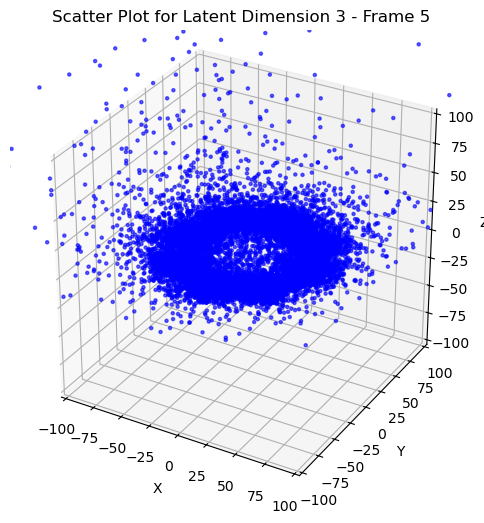

In [4]:
# Number of frames for the GIFs
num_frames = 10  # Example number of frames

# Set this to True if you want 3D scatter plots
is_3d = True  # Change to False for 2D

# Create GIFs and log files for all latent dimensions
create_gifs_for_all_dimensions(num_frames, is_3d)
